In [1]:
# numerical tools and libraries
import numpy as np
from numpy import array, pi
from scipy.integrate import solve_ivp
# plotting tools and libraries
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.style.use("ggplot")

In [2]:
def bruss_rhs(y, t, h, D1, D2, A, B):
    
    u = y[::2]
    v = y[1::2]
    
    dydt = np.empty_like(y)
    dudt = dydt[::2]
    dvdt = dydt[1::2]
    
    dudt[0]    = Fu(u[0],    v[0],    A, B) + D1 * (-2*u[0] + 2*u[1]) / h**2
    dvdt[0]    = Fu(u[0],    v[0],    A, B) + D2 * (-2*v[0] + 2*v[1]) / h**2
    
    dudt[1:-1] = Fu(u[1:-1], v[1:-1], A, B) + D1 * np.diff(u, 2) / h**2
    dvdt[1:-1] = Fu(u[1:-1], v[1:-1], A, B) + D2 * np.diff(v, 2) / h**2

    dudt[-1]   = Fu(u[0],    v[0],    A, B) + D1 * (-2*u[-1] + 2*u[-2]) / h**2
    dvdt[-1]   = Fu(u[0],    v[0],    A, B) + D2 * (-2*v[-1] + 2*v[-2]) / h**2
    
    return dydt


def Fu(u, v, A, B):
    return A - (B+1)*u + u**2*v

def Fv(u, v, A, B):
    return B*u - u**2*v

In [3]:
def solve_bruss_eq(l, D1, D2, A, B, omega, eps, phi, psi, T, h, tau):
    
    N, M = int(l / h), int(T / tau)
    x = np.linspace(0, l, N+1)
    t = np.linspace(0, T, M+1)
    xx, tt = np.meshgrid(x, t)
    
    u0 = phi(x, A, eps, omega)
    v0 = psi(x, A, B)
    y0 = np.empty(2*N+2)
    y0[::2] = u0
    y0[1::2] = v0

    sol = solve_ivp(
        lambda t, y: bruss_rhs(y, t, h, D1, D2, A, B),
        t_span=(0, T), y0=y0, method='LSODA', t_eval=t)
    
    if sol.success:     
        uu = sol.y[::2].T
        vv = sol.y[1::2].T
        return uu, vv, xx, tt
    else:
        raise RuntimeError("Method didn't converge for such set of parameters.")   

In [4]:
def plot_bruss_eq_solution(uu, vv, xx, tt):
    
    h = xx[0, 1] - xx[0, 0]
    tau = tt[1, 0] - tt[0, 0]
    fig = plt.figure(figsize=(9, 4), facecolor='white')
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_wireframe(xx, tt, uu, alpha=0.65, label='$u(x, t)$')
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_wireframe(xx, tt, vv, alpha=0.65, label='$v(x, t)$')
    
    for ax in [ax1, ax2]:
        ax.patch.set_color('white')
        ax.patch.set_alpha(1)
        ax.set_xlabel('$x$')
        ax.set_ylabel('$t$')
        ax.legend()
        
    s = "Solution of Brusselator equation, $h=%.2f, \\tau=%.2f$" % (h, tau)
    fig.text(0.35, 0.95, s)    
    fig.tight_layout()
    return fig

<IPython.core.display.Javascript object>


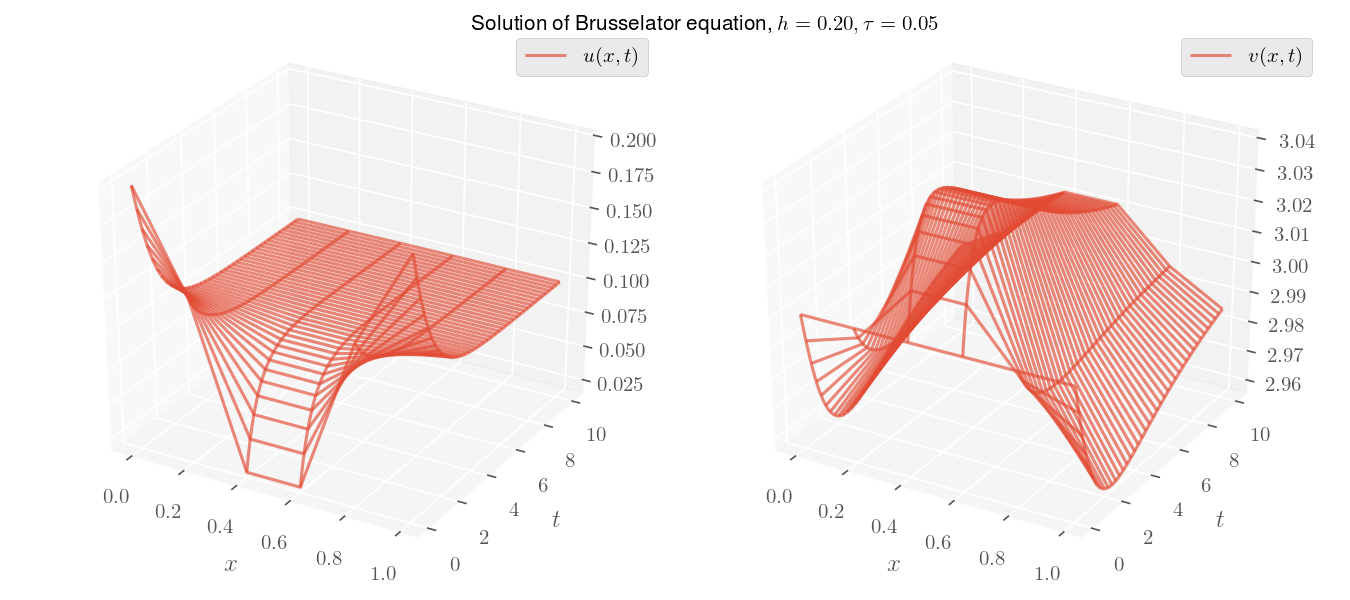

In [5]:
model_params1 = {
    'l': 1, 'A': 0.1, 'B': 0.3,
    'D1': 0.01, 'D2': 0.005,
    'omega': 2*pi, 'eps': 1,
    'phi': lambda x, A, eps, omega: A*(1 + eps * np.cos(omega*x)),
    'psi': lambda x, A, B: B / A
}
method_params1 = {
    'T': 10, 'h': 0.2, 'tau': 0.05
}

solution1 = solve_bruss_eq(**model_params1, **method_params1)

fig1 = plot_bruss_eq_solution(*solution1)
fig1.canvas.print_png('bruss_sol,h=0.2.png', facecolor='white')

<IPython.core.display.Javascript object>


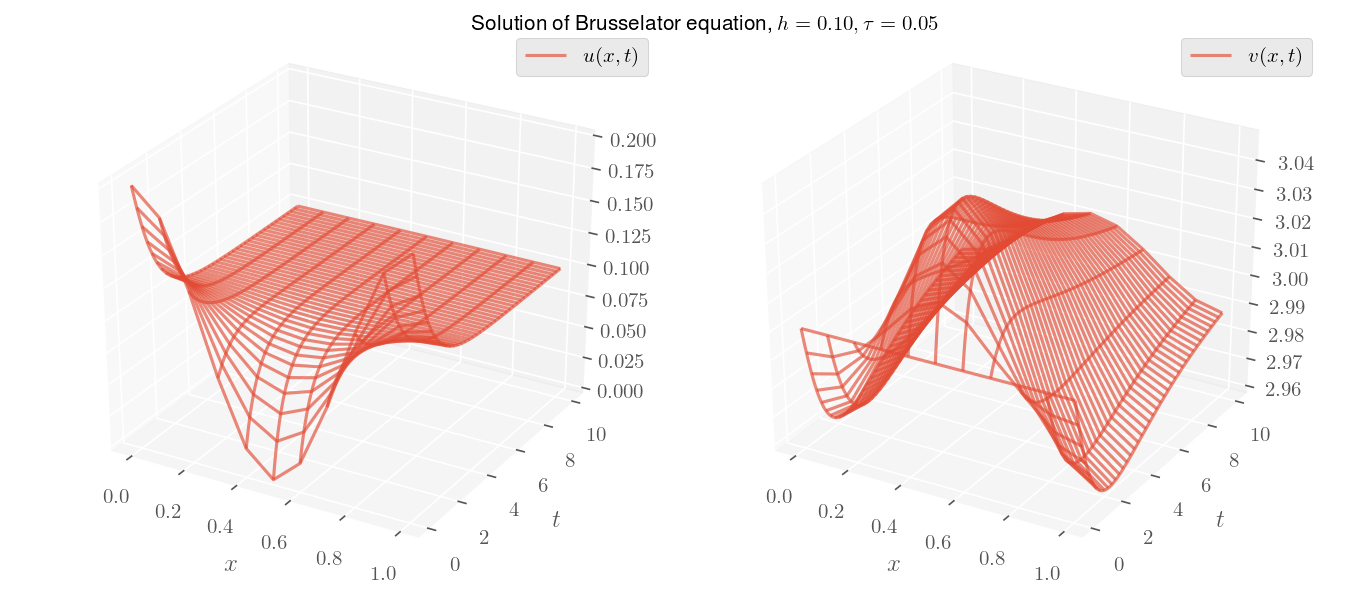

In [6]:
model_params2 = model_params1
method_params2 = {
    'T': 10, 'h': 0.1, 'tau': 0.05
}

solution2 = solve_bruss_eq(**model_params2, **method_params2)

fig2 = plot_bruss_eq_solution(*solution2)
fig2.canvas.print_png('bruss_sol,h=0.1.png', facecolor='white')

<IPython.core.display.Javascript object>


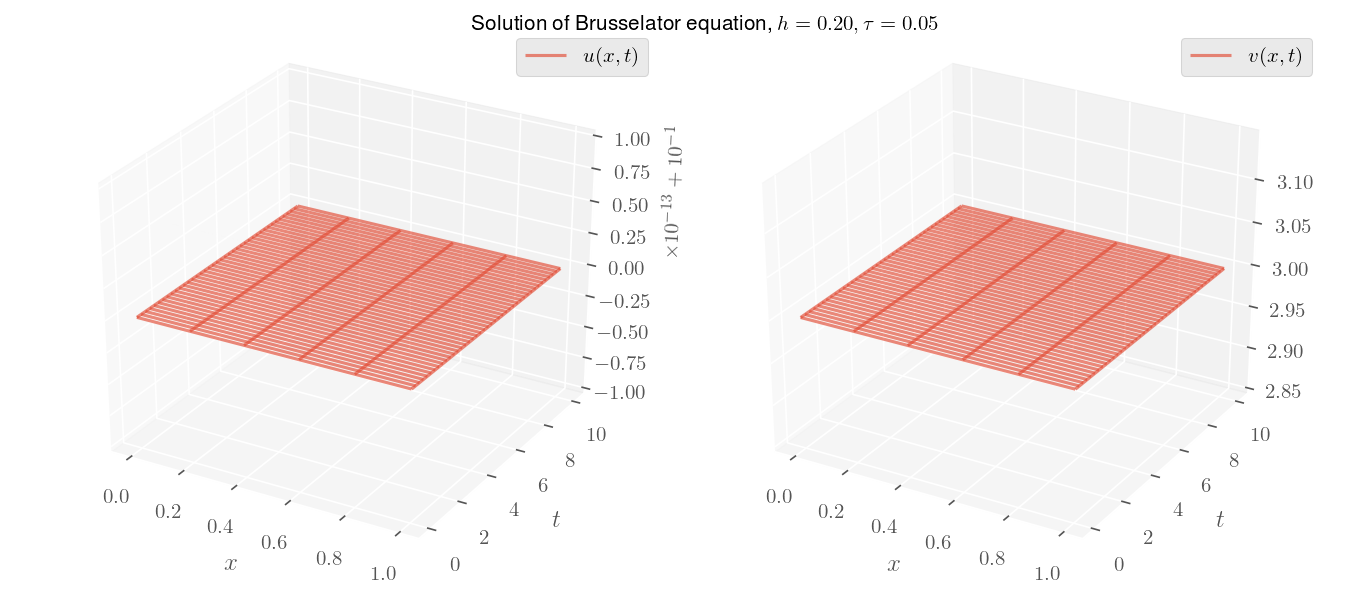

In [7]:
model_params3 = model_params1.copy()
model_params3['eps'] = 0
method_params3 = method_params1

solution3 = solve_bruss_eq(**model_params3, **method_params3)

fig3 = plot_bruss_eq_solution(*solution3)
fig3.canvas.print_png('bruss_stat_sol,eps=0.png', facecolor='white')

<IPython.core.display.Javascript object>


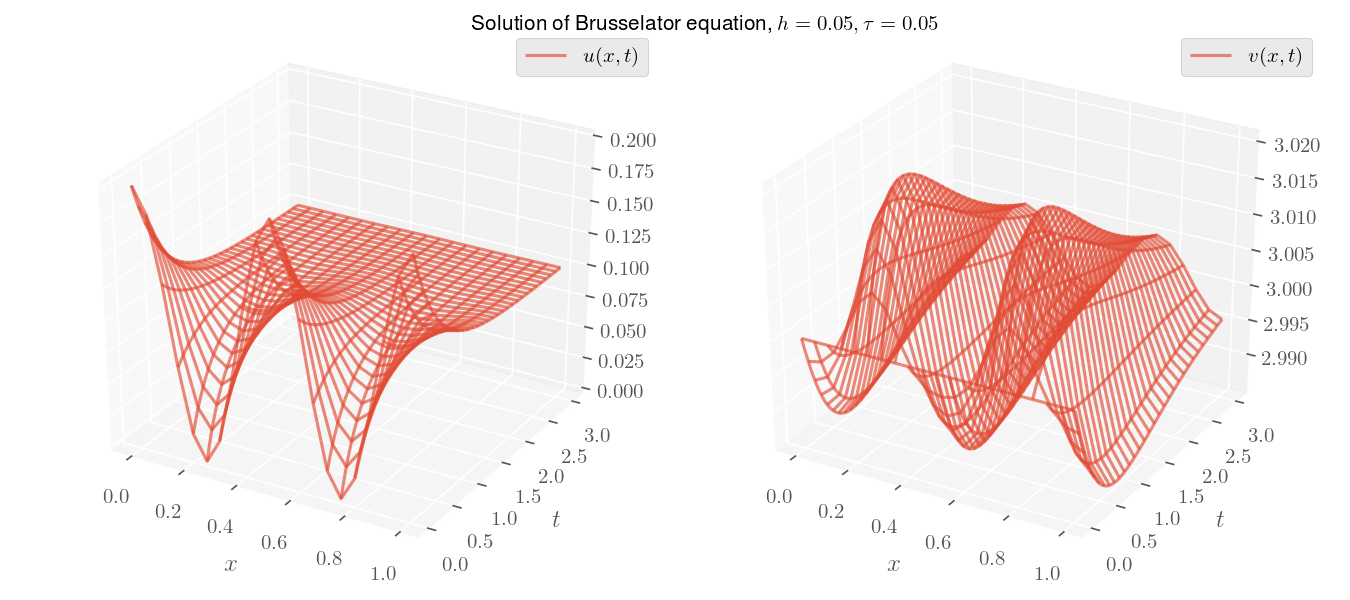

In [8]:
model_params4 = model_params1.copy()
model_params4['omega'] = 4*pi
method_params4 = {
    'T': 3, 'h': 0.05, 'tau': 0.05
}

solution4 = solve_bruss_eq(**model_params4, **method_params4)

fig4 = plot_bruss_eq_solution(*solution4)
fig4.canvas.print_png('bruss_sol2,omega=4pi.png', facecolor='white')